# INFO 2950 Final Project - Phase II

# Research Questions:
How do different genres correlate with IMDb ratings over time? Do movies that belong to multiple genres have higher or lower ratings than those classified under a single genre?

In this assignment, we aim to explore the correlation between movie genres and IMDb ratings, focusing on films released after the year 2000. We will examine whether the genre type influences the ratings a movie receives and investigate if the number of genres a movie is associated with has a positive or negative impact on its rating. Our analysis will involve training a linear regression model to predict a movie's popularity based on its genre and the number of genres it belongs to (with the weight).

# Dataset Description:
For this project, we are using two datasets from IMDb: **title.basics.tsv** and **title.ratings.tsv**, sourced from IMDb's dataset repository. These datasets provide information about movie titles, their ratings, and other attributes, allowing us to explore the relationship between genres and IMDb ratings in relation to our question.

As for our cleaned dataset, we kept the necessary information including the movie title, genre, runtime minutes, release year, average rating, and number of votes for the average rating. 


This file contains basic information about titles, the observations and attributes are listed below:
- **Observations**:
Each row of this dataset represents a movie, its relevant information like title, genre, years and ratings. 
- **Arrtibutes**: 
  - primaryTitle: The title commonly used for promotional purposes.  
  - startYear: The year the title was released.
  - runtimeMinutes: The duration of the title in minutes.
  - genres: Up to three genres associated with the title.
  - averageRating: The average IMDb rating for the title.
  - numVotes: The number of votes used to calculate the average rating.

**Data origin**:
The two datasets we used were funded and created by IMDb officials for access to customers for personal and non-commercial use.

**Factors affecting the data**:
The data observed and recorded might have been influenced by how the data is collected. For IMDb, they collect their data through various sources, including direct input from filmmakers, studios, and users, as well as IMDb's internal data collection processes. In addition, the data or ratings submitted by users can cause biases, because the information may be incomplete or reflect the accurate titles. Lastly, the data could be influenced by IMDb's editorial policies and the submission guidelines they provide to contributors. 

**Data processing**:
These datasets created by IMDb are well formatted as TSV. Therefore, there’s no more steps needed to be done to use the dataset on our end.
For processing, we restricted the data to movies released after the year 2000 to ensure consistency in rating standards, because the audience watching these movies likely belongs to the same or adjacent generations. We also kept only the essential fields—movie title, release year, genre, ratings, and number of votes—to ensure the dataset is clean and focused solely on the information relevant to our analysis.


**Source**: These datasets can be found on the official website of IMDb through the following link: https://developer.imdb.com/non-commercial-datasets/

# Data Limitations:
- ⁠Although IMDb is a popular and comprehensive source for movies, it does not include every film in its database. Certain niche genres or less popular films might be underrepresented, which will potentially affect the breadth of data for analysis.
- ⁠IMDb has over 83 million registered users, but not all users actively rate movies. This could result in biased average ratings, particularly for less popular genres, because those films may not receive enough ratings to provide a reliable representation.
- ⁠Some genres have significantly more movies than others (over 70,000 versus fewer than 10,000). This discrepancy could skew the overall average rating of a genre. A genre with fewer movies might show higher or lower average ratings, simply because the sample size is smaller, making it more sensitive to outliers.
- ⁠Movies with fewer ratings are easier to get bias or volatility in their average ratings compared to movies with a large number of ratings. A highly-rated movie with only a few voters might not accurately reflect the broader audience's opinion. On the other hand, movies with thousands of ratings are likely to present a more reliable average.


# Data Cleaning 
The following demonstrates how we processed our data to make it analysis ready.

## Our python imports

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

# Importing our dataset:


Here we import our title.basics.tsv file in its raw form.

In [7]:

movies = pd.read_csv('title.basics.tsv', delimiter="\t")

/var/folders/wp/g5m22lm52z12bhcl43p2tsf40000gn/T/ipykernel_67703/992013730.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('title.basics.tsv', delimiter="\t")


Here we look at  the first 10 rows of our dataset to decide how we are going to clean it.

In [8]:
print(movies.shape)
movies.head(10)

(11169285, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In the following cell we filter out many of the things that are irrilevant to our research question and clean our data by removing empty values marked as "\N" in the original dataset. Since our focus is on movies, we also filter out data related to short films or tv series or other types that the original dataset had. We also limit our analysis to movies that were released in the 21st century so that it is more relevant to our generation. 

Since our dataset is huge we had to do multiple filtering steps and cleaning to get a clean, nice, and relatively smaller dataset that we can easily run our analysis on for later parts of this project. We save the filtered out dataset in a csv file that we titled "cleaned_data" and we will refer to it later when we do more analysis and when we do combined analysis with the movie ratings dataset.


In [9]:
# Remove columns we don't need for our research question:
columns_to_remove = ['isAdult', 'originalTitle', 'endYear']
movies = movies.drop(columns = columns_to_remove)

# Filter out rows where startYear is '\N'
df = movies[movies['startYear'] != '\\N']

# Convert startYear from string to int
df['startYear'] = df['startYear'].astype(int)

# Filter out shows
df = df[df['titleType'] == "movie"]

# Filter out years before 2000
df = df[df['startYear'] >= 2000]

# Filter out years after 2024
df = df[df['startYear'] <= 2024]

# Save the cleaned data 
df.to_csv('cleaned_data.csv', index=False)

/var/folders/wp/g5m22lm52z12bhcl43p2tsf40000gn/T/ipykernel_67703/904516432.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startYear'] = df['startYear'].astype(int)


Here we save our cleaned data to a new dataframe that we will use in the following steps.

In [10]:
cleaned_movies_df = pd.read_csv('cleaned_data.csv')

Here, we display a summary of our cleaned data. We see that the size of our newly cleaned data is much smaller than the original one with 338244 entries. 

In [11]:
cleaned_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336388 entries, 0 to 336387
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          336388 non-null  object
 1   titleType       336388 non-null  object
 2   primaryTitle    336386 non-null  object
 3   startYear       336388 non-null  int64 
 4   runtimeMinutes  336388 non-null  object
 5   genres          336388 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.4+ MB


Here, we display the first 10 entries of our new cleaned dataset to visualize it and make sure we did our cleaning right:

In [12]:
cleaned_movies_df.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres
0,tt0011801,movie,Tötet nicht mehr,2019,\N,"Action,Crime"
1,tt0015414,movie,La tierra de los toros,2000,60,\N
2,tt0035423,movie,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance"
3,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama
4,tt0067758,movie,"Simón, contamos contigo",2015,81,"Comedy,Drama"
5,tt0069049,movie,The Other Side of the Wind,2018,122,Drama
6,tt0070596,movie,Socialist Realism,2023,78,Drama
7,tt0077684,movie,Histórias de Combóios em Portugal,2022,46,Documentary
8,tt0082328,movie,Embodiment of Evil,2008,94,Horror
9,tt0088751,movie,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi"


Here we import another file which have the ratings and the number of votes for each movie.

In [13]:
ratings_df = pd.read_csv("title.ratings.tsv", delimiter = "\t")

Here we print the first 10 rows of ratings_df to visualize it better:


In [14]:
print(ratings_df.shape)
ratings_df.head(10)

(1479288, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2090
1,tt0000002,5.6,283
2,tt0000003,6.5,2094
3,tt0000004,5.4,184
4,tt0000005,6.2,2828
5,tt0000006,5.0,196
6,tt0000007,5.4,889
7,tt0000008,5.4,2233
8,tt0000009,5.4,214
9,tt0000010,6.8,7699


Here we combined both tables using SQL to do further analysis that depends on the ratings of each movie as well as the details in previous cleaned_movies_df

In [15]:

joined_df = duckdb.sql("SELECT * FROM cleaned_movies_df LEFT JOIN ratings_df ON cleaned_movies_df.tconst = ratings_df.tconst").to_df()
joined_df.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,tconst_1,averageRating,numVotes
0,tt17507008,movie,Trending Topic,2023,121,"Crime,Drama",tt17507008,5.7,196.0
1,tt17507072,movie,Silsila Sidnaaz Ka,2021,70,Romance,tt17507072,9.4,178.0
2,tt17507180,movie,Vishu,2022,\N,"Drama,Romance",tt17507180,9.0,38.0
3,tt17507306,movie,High Rise: Path to Nowhere,2022,\N,Crime,tt17507306,9.1,11.0
4,tt17507324,movie,Manasagide,2022,135,"Mystery,Romance",tt17507324,7.8,8.0
5,tt17507486,movie,Aval Thediyathu?,2022,151,Horror,tt17507486,1.8,24.0
6,tt17507548,movie,Instant Karma,2022,106,Thriller,tt17507548,5.4,11.0
7,tt17507586,movie,No No Girl,2022,120,"Comedy,Drama,Mystery",tt17507586,8.0,28.0
8,tt17507906,movie,FOUR: Vol. I,2022,65,"Crime,Mystery,Thriller",tt17507906,8.4,54.0
9,tt17508126,movie,Narai Ezhuthum Suyasaritham,2022,82,Drama,tt17508126,7.6,454.0


# Exploratory Data Aalysis. 



In [16]:
print(joined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336388 entries, 0 to 336387
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          336388 non-null  object 
 1   titleType       336388 non-null  object 
 2   primaryTitle    336386 non-null  object 
 3   startYear       336388 non-null  int64  
 4   runtimeMinutes  336388 non-null  object 
 5   genres          336388 non-null  object 
 6   tconst_1        185116 non-null  object 
 7   averageRating   185116 non-null  float64
 8   numVotes        185116 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 23.1+ MB
None


In [17]:
print(joined_df.describe())

           startYear  averageRating      numVotes
count  336388.000000  185116.000000  1.851160e+05
mean     2014.596805       6.265477  4.405841e+03
std         6.431580       1.501080  3.930720e+04
min      2000.000000       1.000000  5.000000e+00
25%      2010.000000       5.400000  1.900000e+01
50%      2015.000000       6.400000  6.900000e+01
75%      2020.000000       7.300000  3.830000e+02
max      2024.000000      10.000000  2.922922e+06


In [18]:
unique_genres = df['genres'].str.split(',').explode().str.strip().unique()
print(len(unique_genres))
print(unique_genres)

# Count of movies per genre
print(joined_df['genres'].value_counts())

27
['Action' 'Crime' '\\N' 'Comedy' 'Fantasy' 'Romance' 'Drama' 'Documentary'
 'Horror' 'Sci-Fi' 'Mystery' 'Thriller' 'Adventure' 'Musical' 'Biography'
 'Music' 'Animation' 'Family' 'War' 'History' 'Adult' 'Sport' 'Western'
 'News' 'Reality-TV' 'Talk-Show' 'Game-Show']
genres
Documentary                    78618
Drama                          57422
Comedy                         20759
\N                             16354
Horror                          9533
                               ...  
Comedy,Sci-Fi,Sport                1
Family,Romance,Sci-Fi              1
Comedy,Mystery,Sport               1
Adult,Comedy,Music                 1
Animation,Documentary,Sport        1
Name: count, Length: 1254, dtype: int64


In [19]:
romance_movies = duckdb.sql("SELECT * FROM joined_df WHERE genres LIKE '%Romance%'").df()
romance_movies.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,tconst_1,averageRating,numVotes
0,tt17507072,movie,Silsila Sidnaaz Ka,2021,70,Romance,tt17507072,9.4,178.0
1,tt17507180,movie,Vishu,2022,\N,"Drama,Romance",tt17507180,9.0,38.0
2,tt17507324,movie,Manasagide,2022,135,"Mystery,Romance",tt17507324,7.8,8.0
3,tt1753460,movie,August,2011,99,"Drama,Romance",tt1753460,6.2,2046.0
4,tt1753693,movie,Detour,2013,87,"Horror,Romance,Thriller",tt1753693,5.2,1040.0
5,tt17537916,movie,10 Reasons Why Men Cheat,2022,90,Romance,tt17537916,3.8,50.0
6,tt1753806,movie,Eyes Find Eyes,2011,82,"Crime,Romance,Thriller",tt1753806,4.7,28.0
7,tt1753813,movie,"Farewell, My Queen",2012,100,"Drama,History,Romance",tt1753813,6.2,9223.0
8,tt1753837,movie,Four Fifteen,2011,105,"Drama,Romance",tt1753837,8.0,13.0
9,tt1753865,movie,Summer Games,2011,101,"Drama,Romance",tt1753865,6.5,445.0


In [20]:
horror_movies = duckdb.sql("SELECT * FROM joined_df WHERE genres LIKE '%Horror%'").df()
horror_movies.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,tconst_1,averageRating,numVotes
0,tt17507486,movie,Aval Thediyathu?,2022,151,Horror,tt17507486,1.8,24.0
1,tt17510216,movie,Bldg. N,2022,103,Horror,tt17510216,3.6,69.0
2,tt17511968,movie,Streetwalker,2022,98,Horror,tt17511968,3.6,68.0
3,tt17513822,movie,No dejes de grabar,2021,\N,Horror,tt17513822,7.3,9.0
4,tt17519480,movie,Kate Calloway's Second Annual Haunted Hallowee...,2022,\N,Horror,tt17519480,7.0,12.0
5,tt17519798,movie,Cabin Girl,2023,87,"Drama,Horror,Mystery",tt17519798,4.6,707.0
6,tt17521612,movie,Starve Acre,2023,98,"Drama,Horror",tt17521612,5.4,2524.0
7,tt17523850,movie,Axegrinder 4: Souls of Blood,2022,77,Horror,tt17523850,3.5,65.0
8,tt17524834,movie,Livescreamers,2023,90,Horror,tt17524834,6.9,32.0
9,tt17526714,movie,The Substance,2024,141,"Drama,Horror",tt17526714,8.0,11050.0


In [21]:
comedy_movies = duckdb.sql("SELECT * FROM joined_df WHERE genres LIKE '%Comedy%'").df()
comedy_movies.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,tconst_1,averageRating,numVotes
0,tt17507586,movie,No No Girl,2022,120,"Comedy,Drama,Mystery",tt17507586,8.0,28.0
1,tt17514050,movie,Naina ki Sharafat,2022,120,"Comedy,Drama",tt17514050,7.6,23.0
2,tt17517876,movie,Locked-in Society,2022,101,Comedy,tt17517876,6.1,1593.0
3,tt17518262,movie,La edad media,2022,90,"Comedy,Drama,Musical",tt17518262,6.2,87.0
4,tt17518264,movie,Papá o Mamá,2023,100,Comedy,tt17518264,4.9,176.0
5,tt17519036,movie,Roblox the Movie 2: The Attack of J.U.L.I.E.N,2016,117,"Action,Comedy,Western",tt17519036,7.4,37.0
6,tt17520428,movie,One Cut Two Cut,2022,90,Comedy,tt17520428,4.6,561.0
7,tt17526114,movie,Breakup Mountain,2022,84,"Comedy,Thriller",tt17526114,7.4,22.0
8,tt17527468,movie,Bottoms,2023,91,Comedy,tt17527468,6.7,47591.0
9,tt1753382,movie,Death in an Afternoon,2010,89,Comedy,tt1753382,5.0,12.0


In [22]:
drama_movies = duckdb.sql("SELECT * FROM joined_df WHERE genres LIKE '%Drama%'").df()
drama_movies.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,tconst_1,averageRating,numVotes
0,tt17507008,movie,Trending Topic,2023,121,"Crime,Drama",tt17507008,5.7,196.0
1,tt17507180,movie,Vishu,2022,\N,"Drama,Romance",tt17507180,9.0,38.0
2,tt17507586,movie,No No Girl,2022,120,"Comedy,Drama,Mystery",tt17507586,8.0,28.0
3,tt17508126,movie,Narai Ezhuthum Suyasaritham,2022,82,Drama,tt17508126,7.6,454.0
4,tt17511490,movie,The Send-Off,2022,88,Drama,tt17511490,7.6,25.0
5,tt17512706,movie,My Broken Mariko,2022,85,Drama,tt17512706,6.5,582.0
6,tt17514050,movie,Naina ki Sharafat,2022,120,"Comedy,Drama",tt17514050,7.6,23.0
7,tt17514144,movie,3E,2022,110,"Crime,Drama,Thriller",tt17514144,8.5,1229.0
8,tt17518186,movie,Europe,2022,105,Drama,tt17518186,5.3,24.0
9,tt17518262,movie,La edad media,2022,90,"Comedy,Drama,Musical",tt17518262,6.2,87.0


In [23]:
average_movies_drama = duckdb.sql("""
    SELECT startYear, AVG(averageRating) AS avg_rating
    FROM drama_movies
    GROUP BY startYear
    ORDER BY startYear DESC
""").df()
average_movies_comedy = duckdb.sql("""
    SELECT startYear, AVG(averageRating) AS avg_rating
    FROM comedy_movies
    GROUP BY startYear
    ORDER BY startYear DESC
""").df()
average_movies_romance = duckdb.sql("""
    SELECT startYear, AVG(averageRating) AS avg_rating
    FROM romance_movies
    GROUP BY startYear
    ORDER BY startYear DESC
""").df()
average_movies_horror = duckdb.sql("""
    SELECT startYear, AVG(averageRating) AS avg_rating
    FROM horror_movies
    GROUP BY startYear
    ORDER BY startYear DESC
""").df()

average_movies_comedy.rename(columns={'avg_rating': 'avg_rating_comedy'}, inplace=True)

average_movies_drama.rename(columns={'avg_rating': 'avg_rating_drama'}, inplace=True)

average_movies_romance.rename(columns={'avg_rating': 'avg_rating_romance'}, inplace=True)

average_movies_horror.rename(columns={'avg_rating': 'avg_rating_horror'}, inplace=True)

meaw1 = pd.merge(average_movies_comedy, average_movies_drama, how='outer', on='startYear')

meaw2 = pd.merge(meaw1, average_movies_horror, on='startYear', how='outer')

meaw = pd.merge(meaw2, average_movies_romance, on='startYear', how='outer')

# Step 2: Sort the DataFrame by 'startYear'
meaw_sorted = meaw.sort_values(by='startYear', ascending=False)

# Step 3: Reset the index if desired
meaw_sorted.reset_index(drop=True, inplace=True)
print(meaw_sorted)


    startYear  avg_rating_comedy  avg_rating_drama  avg_rating_horror  \
0        2024           6.475505          6.927496           5.739228   
1        2023           6.186642          6.512969           5.157064   
2        2022           5.990905          6.428357           4.968786   
3        2021           5.827794          6.212110           4.773235   
4        2020           5.763327          6.095603           4.637052   
5        2019           5.776881          6.172498           4.724011   
6        2018           5.737841          6.214322           4.707985   
7        2017           5.835624          6.257224           4.751418   
8        2016           5.844644          6.274348           4.866796   
9        2015           5.896625          6.258254           4.823864   
10       2014           5.886125          6.310739           4.910769   
11       2013           5.922577          6.295387           4.856229   
12       2012           5.918509          6.325094 

In [24]:
meaw_long = pd.melt(meaw_sorted, id_vars=['startYear'], 
                    value_vars=['avg_rating_comedy', 'avg_rating_drama', 
                                'avg_rating_horror', 'avg_rating_romance'],
                    var_name='Genre', value_name='Average Rating')
meaw_long

,startYear,Genre,Average Rating
0,2024,avg_rating_comedy,6.475505
1,2023,avg_rating_comedy,6.186642
2,2022,avg_rating_comedy,5.990905
3,2021,avg_rating_comedy,5.827794
4,2020,avg_rating_comedy,5.763327
...,...,...,...
95,2004,avg_rating_romance,5.990226
96,2003,avg_rating_romance,5.933659
97,2002,avg_rating_romance,5.953603
98,2001,avg_rating_romance,6.091165


<Axes: xlabel='startYear', ylabel='Average Rating'>

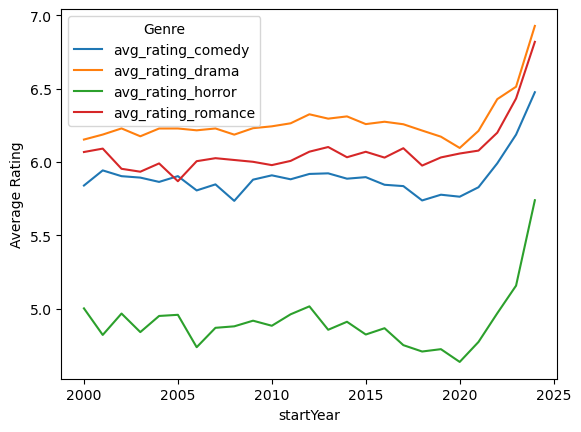

In [25]:
sns.lineplot(data = meaw_long, x = meaw_long['startYear'], y=meaw_long['Average Rating'], hue=meaw_long['Genre'])


# Questions for Reviewers: 
- In the dataset, some movies are listed under multiple genres (up to three). We attempted to separate these genres for individual analyses and then recombine them for visualizations, but we encountered issues with missing values. What would be the best approach to handle multiple genres efficiently without losing data?

- Our dataset currently contains 26 genres. We are considering narrowing this down to around 10, selecting the most popular or relevant genres. Do you think this is a good approach? If so, what criteria should we use to determine which genres to keep for a balanced analysis?

- For the next phase, we are considering the hypothesis that drama movies might receive higher ratings than romance movies. Additionally, we want to explore whether the duration of a movie influences its rating. Do you think these hypotheses are valid? Are there any other factors we should consider?